In [10]:
import json
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from scipy import io
import pandas as pd

### Setup

In [2]:
os.chdir('..')
os.getcwd()

'c:\\Users\\delgr\\Projects\\advancedPython\\Day6a'

### Set Script Parameters

In [ ]:
session_dir = "data/raw/20161214_cori_steinmetz"

In [54]:
session_path = Path(session_dir)
session_path.exists()
extracted_path = Path(f'data/extracted/{session_path.name}/lfp')
extracted_path.mkdir(parents=True, exist_ok=True)


### Extract Data

#### Channel-Regions Mapping

In [35]:
regions_path = session_path / 'lfp/regionmap.txt'
rdf = pd.read_csv(regions_path, sep='\t', header=None)
rdf.columns = ['Channel', 'BrainRegion']
rdf

,Channel,BrainRegion
0,CHAN001,ACA
1,CHAN002,LS
2,CHAN003,MOs
3,CHAN004,CA3
4,CHAN005,DG
5,CHAN006,SUB
6,CHAN007,VISp


In [55]:
rdf.to_csv(extracted_path/'channels.csv', index=False)

#### Times

In [52]:
times = np.loadtxt(session_path / 'lfp/sampletimes.dat', dtype=np.uint32)
times

array([     0,     10,     20, ..., 909970, 909980, 909990],
      shape=(91000,), dtype=uint32)

In [56]:
np.save(extracted_path/'times.npy', times)

#### LFP Recording

In [59]:
lfp = session_path / 'lfp/recording.bin'
data = np.fromfile(lfp, dtype=np.float64).reshape(times.size, len(rdf))
data

array([[ -2.85079365,   0.9414966 ,   4.37979592, ...,  21.82083531,
          6.71088435,   1.12764378],
       [ -4.03968254,  -0.04183673,  -3.55020408, ...,  -5.10939725,
          5.51088435,  -5.8541744 ],
       [ -4.1952381 ,  -8.5085034 ,  -1.47020408, ...,  -4.65590888,
         -5.38911565,  -7.71781076],
       ...,
       [ -5.93401361,  -0.66632653,  -3.64612245, ...,  25.72164215,
          3.46020408,  15.55231911],
       [-12.64512472,  -7.89965986,  -4.52612245, ...,  11.32629331,
         14.11020408,  16.0432282 ],
       [-15.92290249, -17.47465986,  -7.18612245, ...,  18.02396773,
         -5.80646259,   5.57050093]], shape=(91000, 7))

In [60]:
np.save(extracted_path/'recording.npy', data)

### Quality Check

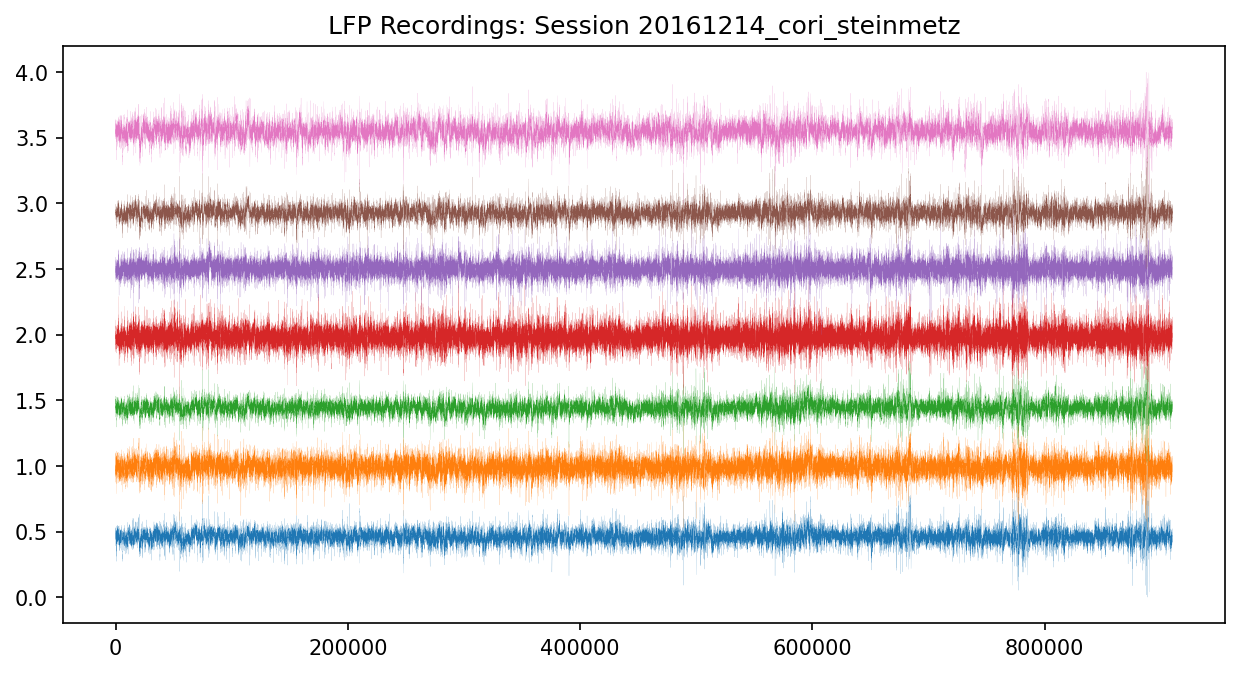

In [84]:
normed = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
plt.figure(figsize=(10, 5), dpi=150)
plt.plot(times, normed + np.arange(normed.shape[1]) / 2, linewidth=.05);
plt.gca().set(
    title=f"LFP Recordings: Session {session_path.name}"
);